In [30]:
%matplotlib inline
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageFilter
import cv2
import pytesseract
import re
from deskew import determine_skew
import imutils
import numpy as np

In [ ]:
pytorch_model_path = 'models/best.pt'
images_folder = 'photos/'
# pytesseract.pytesseract.tesseract_cmd = r'<full_path_to_your_tesseract_executable>'
# FOR WINDOWS ^

In [102]:
model = YOLO(pytorch_model_path)

In [137]:
def add_padding(img, box, padding=10):
    x1, y1, x2, y2 = box
    h, w = img.shape[:2]
    x1 = max(0, x1 - padding)
    y1 = max(0, y1 - padding)
    x2 = min(w, x2 + padding)
    y2 = min(h, y2 + padding)
    return x1, y1, x2, y2

In [136]:
def detect_number(img, result):
    img_ = img.copy()
    ret = []
    for i, box in enumerate(result[0].boxes.xyxy.tolist()):
        box = list(map(int, box))
        x1, y1, x2, y2 = add_padding(img, box)
        cropped = img[y1:y2, x1:x2]
        number = pytesseract.image_to_string(cropped, config='--psm 8 -c tessedit_char_whitelist=0123456789') # --psm 8 --oem 3 -c tessedit_char_whitelist=0123456789
        number = re.sub(r'\D', '', number)
        ret.append((number, box))
        print(f'Box {i}: {number}')
        cv2.rectangle(img_, (x1, y1), (x2, y2), (0, 255, 0), 2)
        margin = 20
        cv2.putText(img_, number, (x1 + margin, y1 + margin), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    plt.imshow(img_)
    plt.show()
    return ret
    

In [233]:
def deskew(image, angle):
    '''
    This function helps adjusts the image according to the determined skew angle as apart of the image pre-processing for optimal
    OCR results. 
    '''
    non_zero_pixels = cv2.findNonZero(cv2.bitwise_not(image))
    center, _, _ = cv2.minAreaRect(non_zero_pixels) # _, _ = wh, theta

    root_mat = cv2.getRotationMatrix2D(center, angle, 1)
    rows, cols = image.shape
    rotated = cv2.warpAffine(image, root_mat, (cols, rows), flags=cv2.INTER_CUBIC)

    return rotated


def crop_dark_regions(image):
    '''
    This function removes the border of the image. A dark border can skew characterizations. 
    '''
    mask = np.zeros(image.shape, dtype=np.uint8)

    cnts = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    cv2.fillPoly(mask, cnts, [255,255,255])
    mask = 255 - mask
    result = cv2.bitwise_or(image, mask)

    return result

def preprocess_cropped(cropped):
  img = imutils.resize(cropped, width=300) # type = np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  angle = determine_skew(img)
  img = deskew(img, angle)
  img = crop_dark_regions(img)
  img = cv2.bilateralFilter(img, 11, 17, 17)
  img = crop_dark_regions(img)
  img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  #img = img.filter(ImageFilter.GaussianBlur(radius=1))
  return img

def extract_number(img):
  number = pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')
  number = re.sub(r'\D', '', number)
  return number

image 1/1 /mnt/big/Downloads/photos10kmCasa2023/329520730_579942377384512_8192429014161486390_n.jpg: 640x448 (no detections), 68.2ms
Speed: 19.1ms preprocess, 68.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)


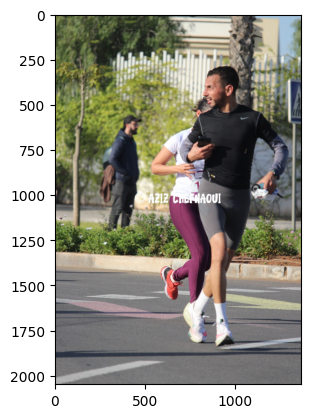


image 1/1 /mnt/big/Downloads/photos10kmCasa2023/330910884_763872045170410_7897447431896678877_n.jpg: 640x448 1 number, 66.0ms
Speed: 1.7ms preprocess, 66.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 3093


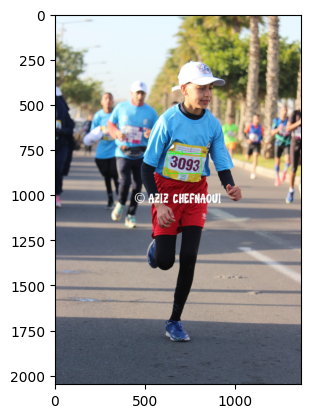

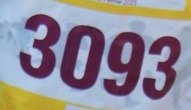

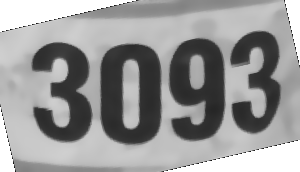

3093

image 1/1 /mnt/big/Downloads/photos10kmCasa2023/330960198_765459574924564_2317964029640888711_n.jpg: 640x448 1 number, 65.2ms
Speed: 3.0ms preprocess, 65.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 1648


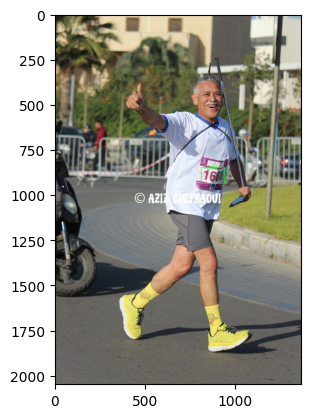

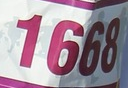

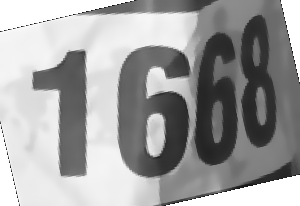

1668

image 1/1 /mnt/big/Downloads/photos10kmCasa2023/330962736_5972606289469856_7013057274036417587_n.jpg: 640x448 2 numbers, 62.9ms
Speed: 1.8ms preprocess, 62.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 3185
Box 1: 3034


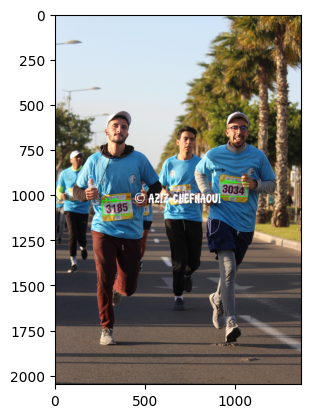

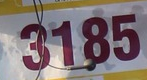

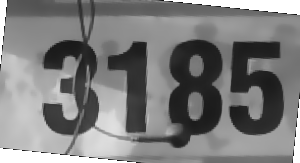

3185


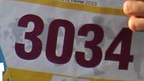

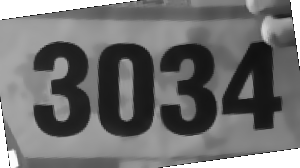

3034

image 1/1 /mnt/big/Downloads/photos10kmCasa2023/330965565_778252763215800_7281620883923008568_n.jpg: 448x640 (no detections), 66.8ms
Speed: 2.9ms preprocess, 66.8ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


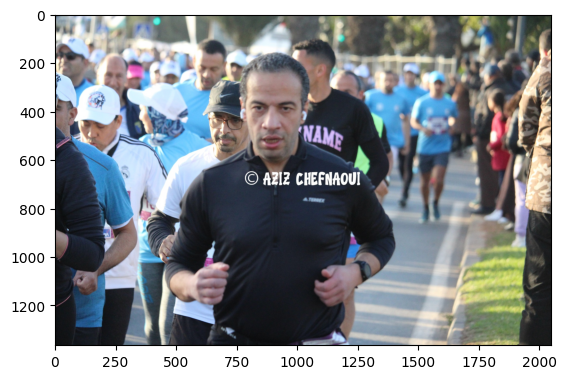


image 1/1 /mnt/big/Downloads/photos10kmCasa2023/330967380_1406776556527071_2251653712120128813_n.jpg: 640x448 (no detections), 67.1ms
Speed: 2.1ms preprocess, 67.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)


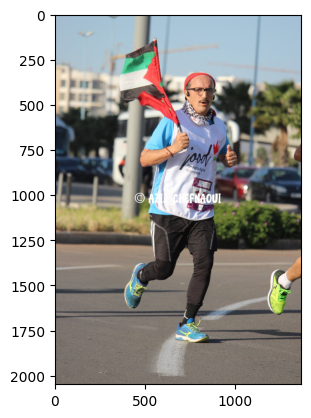


image 1/1 /mnt/big/Downloads/photos10kmCasa2023/330968329_1414839109323055_3565828632293647507_n.jpg: 640x448 1 number, 67.2ms
Speed: 2.9ms preprocess, 67.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 1355


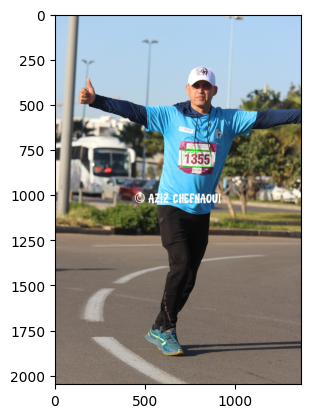

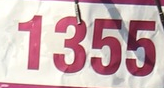

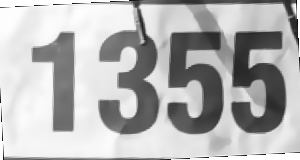

1355

image 1/1 /mnt/big/Downloads/photos10kmCasa2023/330971780_919222629269456_4575882796962661897_n.jpg: 640x448 (no detections), 65.3ms
Speed: 2.0ms preprocess, 65.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 448)


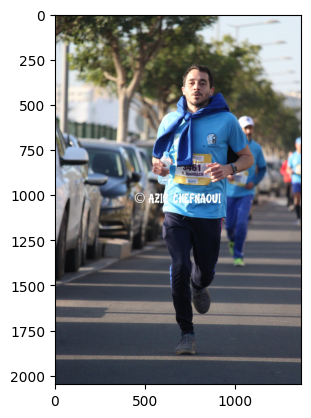


image 1/1 /mnt/big/Downloads/photos10kmCasa2023/330991876_559403296251100_474177718744273108_n.jpg: 640x448 1 number, 66.2ms
Speed: 4.0ms preprocess, 66.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 5


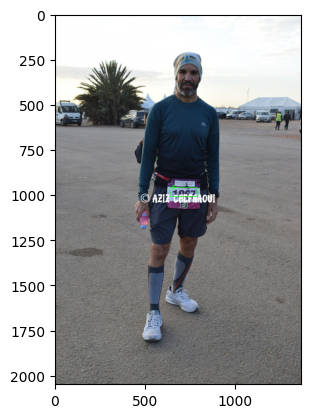

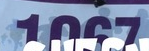

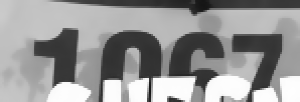

1

image 1/1 /mnt/big/Downloads/photos10kmCasa2023/331079051_925141698922685_4991115962126594834_n.jpg: 640x448 (no detections), 63.3ms
Speed: 1.8ms preprocess, 63.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


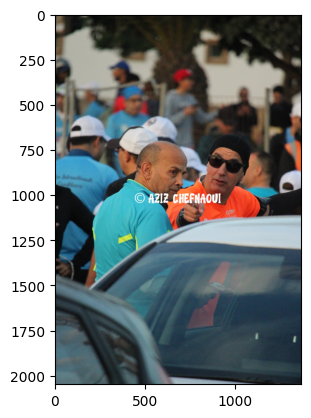


image 1/1 /mnt/big/Downloads/photos10kmCasa2023/330960722_894790255064288_4365291593029826278_n.jpg: 448x640 2 numbers, 64.5ms
Speed: 1.8ms preprocess, 64.5ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Box 0: 109
Box 1: 1980


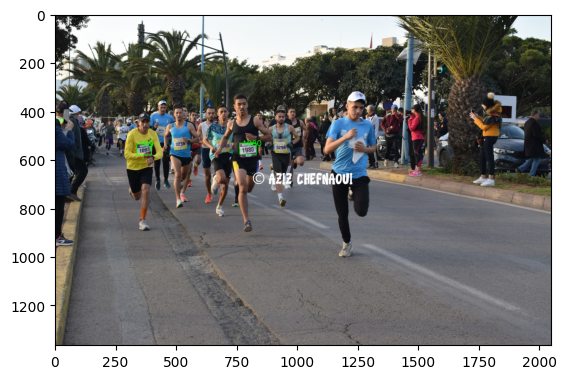

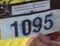

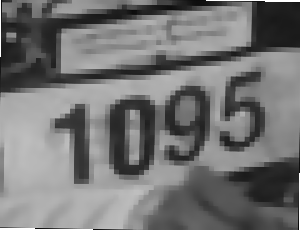

0


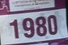

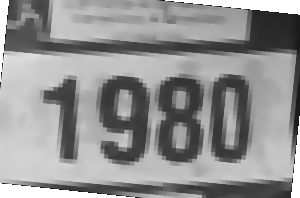

19661


In [235]:
import os
images = os.listdir(images_folder)
for i, image in enumerate(images[30:]):
    img = cv2.imread(images_folder + image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = model.predict(images_folder + image)
    boxes = detect_number(img, result)
    for box in boxes:
      box_ = add_padding(img, box[1])
      cropped = img[box_[1]:box_[3], box_[0]:box_[2]]
      pre_cropped = preprocess_cropped(cropped)
      number = extract_number(pre_cropped)
      cropped = Image.fromarray(cropped)
      display(cropped)
      display(pre_cropped)
      print(number)
    if i == 10:
        break

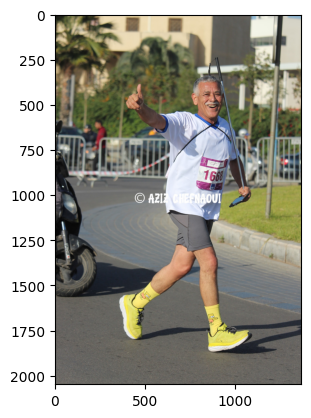

In [217]:
test_path = images_folder + '330960198_765459574924564_2317964029640888711_n.jpg'
img = cv2.imread(test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
# plt.show()


image 1/1 /mnt/big/Downloads/photos10kmCasa2023/330960198_765459574924564_2317964029640888711_n.jpg: 640x448 1 number, 66.8ms
Speed: 7.6ms preprocess, 66.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)
Box 0: 1648


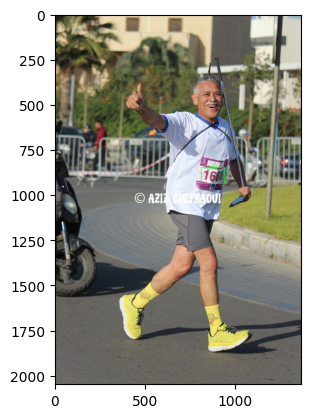

In [218]:
result = model.predict(test_path)
boxes = detect_number(img, result)
box = boxes[0]
box_ = add_padding(img, box[1])
img = img[box_[1]:box_[3], box_[0]:box_[2]]
# cropped = Image.fromarray(cropped)
# display(cropped)
# print(box[0])

'1648\n'

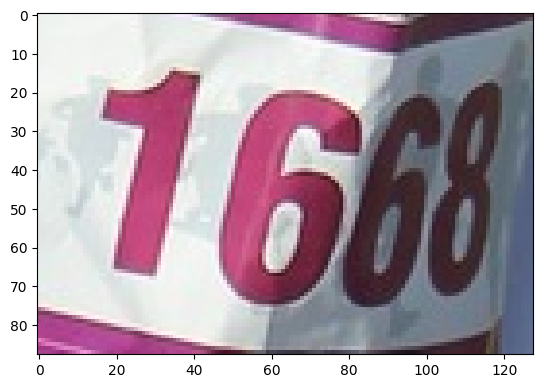

In [219]:
plt.imshow(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

'1648\n'

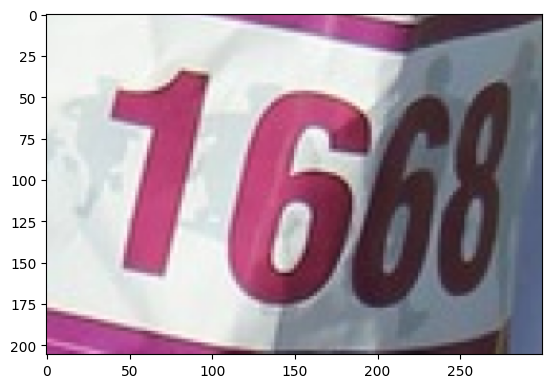

In [220]:
img = imutils.resize(cropped, width=300)
plt.imshow(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

'1648\n'

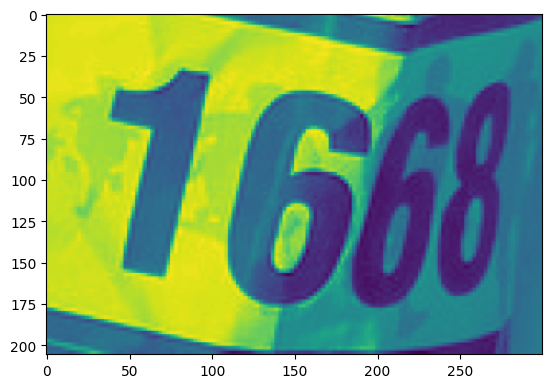

In [221]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

In [222]:
angle = determine_skew(img)
angle

13.000000000000005

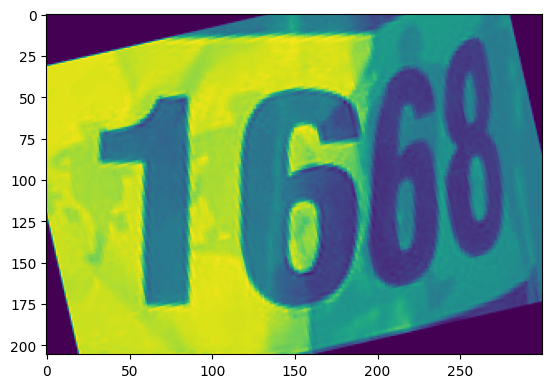

In [223]:
img = deskew(img, angle)
plt.imshow(img)

In [224]:
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

'1668\n'

'1668\n'

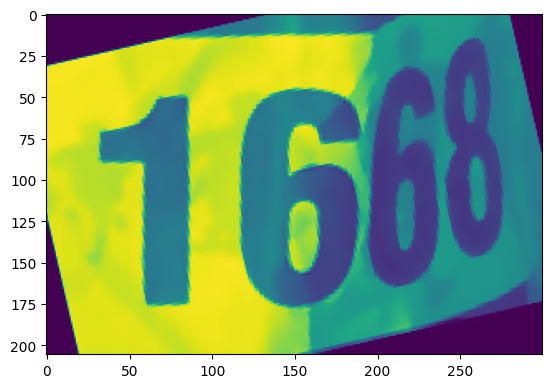

In [225]:
img = cv2.bilateralFilter(img, 11, 17, 17)
plt.imshow(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

'1668\n'

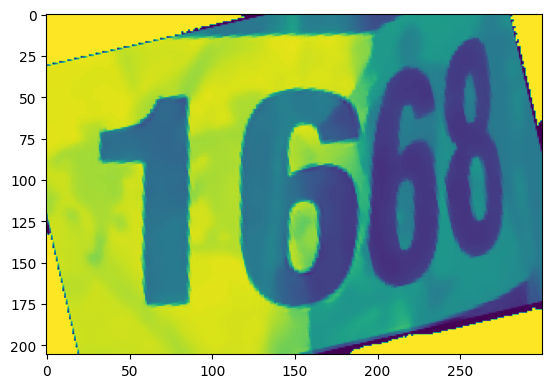

In [226]:
img = crop_dark_regions(img)
plt.imshow(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

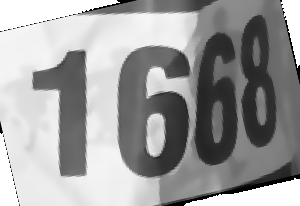

'1668\n'

In [227]:
img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
display(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

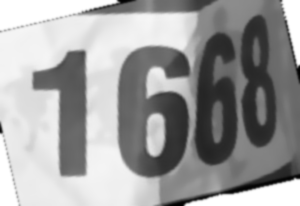

'1668\n'

In [228]:
img = img.filter(ImageFilter.GaussianBlur(radius=1))
display(img)
pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

In [229]:
# brightness = ImageEnhance.Brightness(img)
# img = brightness.enhance(1.5)
# display(img)
# pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

In [230]:
# contrast = ImageEnhance.Contrast(img)
# img = contrast.enhance(2.0)
# display(img)
# pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')

In [231]:
nums = pytesseract.image_to_string(img, config='--psm 8 -c tessedit_char_whitelist=0123456789')
nums

'1668\n'